# Developing a neural network to recognize the letters of the Palmyra alphabet in a digital image

### Connecting the necessary libraries

In [45]:
import os
import tensorflow as tf
import seaborn as sn
import numpy as np
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

### Defining the path to the datasets

In [15]:
# Directory with train dataset
train_dir = ('D:/Neural_network_(Denis_Voinkov)/train')
# Directory with validation dataset
val_dir = ('D:/Neural_network_(Denis_Voinkov)/val')
# Directory with test dataset
test_dir = ('D:/Neural_network_(Denis_Voinkov)/test')
# Image size
image_size = (224, 224)
# Batch size
batch_size = 20

### Data augmentation 

In [35]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 7549 images belonging to 28 classes.


Control of image augmentation

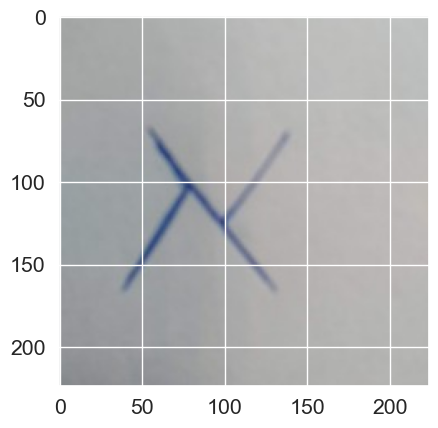

In [33]:
image_file_name = train_dir + '/Aleph//Aleph (105).jpg'
img = tf.keras.utils.load_img(image_file_name, target_size=(224, 224))
plt.imshow(img)

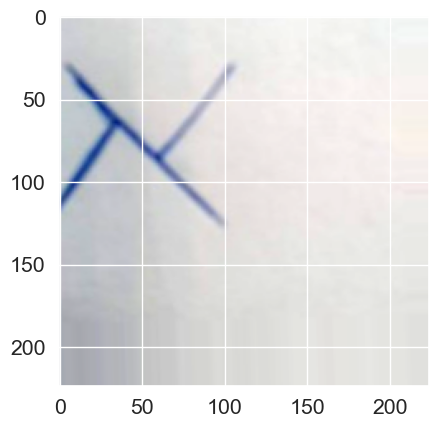

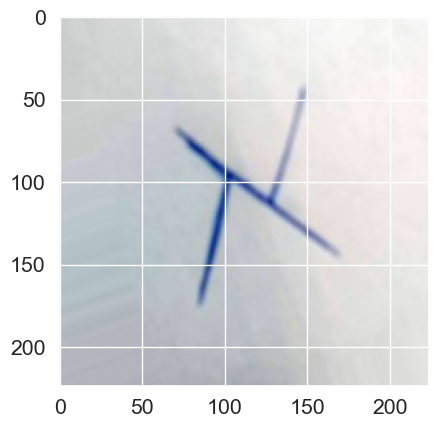

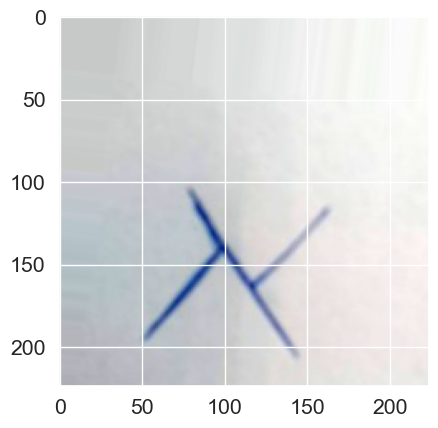

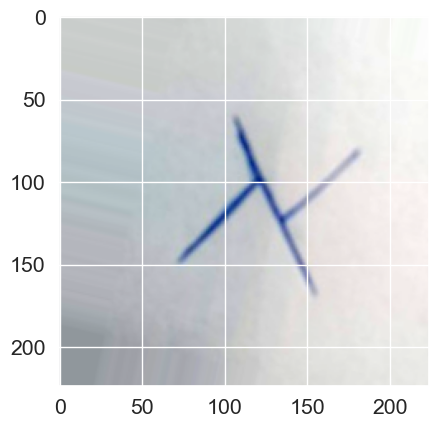

In [36]:
x = tf.keras.utils.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Generators for validation and testing

In [22]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [37]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 1680 images belonging to 28 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = False,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 1680 images belonging to 28 classes.


Callbacks

In [25]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001,
                           patience=10, mode='auto')
chkpt = ModelCheckpoint("D:/Neural_network_(Denis_Voinkov)/model_1.h5",
                        monitor='val_loss',
                        save_best_only=True,
                        mode='auto')
callbacks = [early_stop, chkpt]

### Neural network architecture

In [21]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=(224, 224, 3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(28))
model.add(Activation('softmax'))

Compiling a neural network

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

### Training the model using generators

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=val_generator,
    validation_steps=25,
    callbacks = callbacks)

Epoch 1/100
100/100 [==============================] - 117s 1s/step - loss: 3.3775 - accuracy: 0.0327 - val_loss: 3.3248 - val_accuracy: 0.0520
Epoch 2/100
100/100 [==============================] - 111s 1s/step - loss: 3.1204 - accuracy: 0.0815 - val_loss: 2.7394 - val_accuracy: 0.1820
Epoch 3/100
100/100 [==============================] - 106s 1s/step - loss: 2.8097 - accuracy: 0.1589 - val_loss: 2.4037 - val_accuracy: 0.2560
Epoch 4/100
100/100 [==============================] - 105s 1s/step - loss: 2.5549 - accuracy: 0.2150 - val_loss: 2.4001 - val_accuracy: 0.2960
Epoch 5/100
100/100 [==============================] - 105s 1s/step - loss: 2.4710 - accuracy: 0.2535 - val_loss: 1.9553 - val_accuracy: 0.4000
Epoch 6/100
100/100 [==============================] - 103s 1s/step - loss: 2.2594 - accuracy: 0.3062 - val_loss: 1.6909 - val_accuracy: 0.4620
Epoch 7/100
100/100 [==============================] - 100s 1s/step - loss: 2.0334 - accuracy: 0.3860 - val_loss: 2.1421 - val_accuracy:

### Evaluate the quality of the network with the generator

In [24]:
score = model.evaluate(test_generator)

84/84 [==============================] - 24s 291ms/step - loss: 1.1124 - accuracy: 0.7833


In [25]:
print("Accuracy on test data: %.2f%%" % (score[1]*100))

Accuracy on test data: 78.33%


### Graph of training accuracy vs. validation accuracy 

In [12]:
plt.plot(history.history['accuracy'],
         label='training accuracy')
plt.plot(history.history['val_accuracy'],
         label='validation accuracy')
plt.xlabel('Epoch of training')
plt.ylabel('Training and Validation accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

### Graph of training loss vs. validation loss 

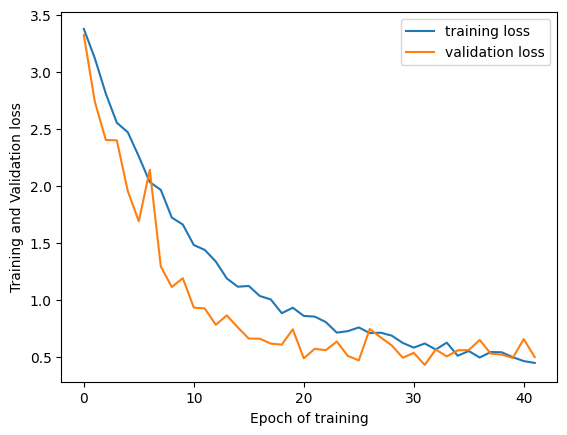

In [27]:
plt.plot(history.history['loss'],
         label='training loss')
plt.plot(history.history['val_loss'],
         label='validation loss')
plt.xlabel('Epoch of training')
plt.ylabel('Training and Validation loss')
plt.legend()
plt.show()

### Confusion Matrix

prediction generator

In [50]:
predictions = model.predict(test_generator,
                            steps=None,
                            max_queue_size=10,
                            workers=0,
                            use_multiprocessing=False,
                            verbose=1)

predicted = np.argmax(predictions, axis=1)
trueClass = test_generator.classes[test_generator.index_array]
classLabels = list(test_generator.class_indices.keys())

84/84 [==============================] - 19s 229ms/step


Confusion Matrix & Classification Report

Confusion Matrix


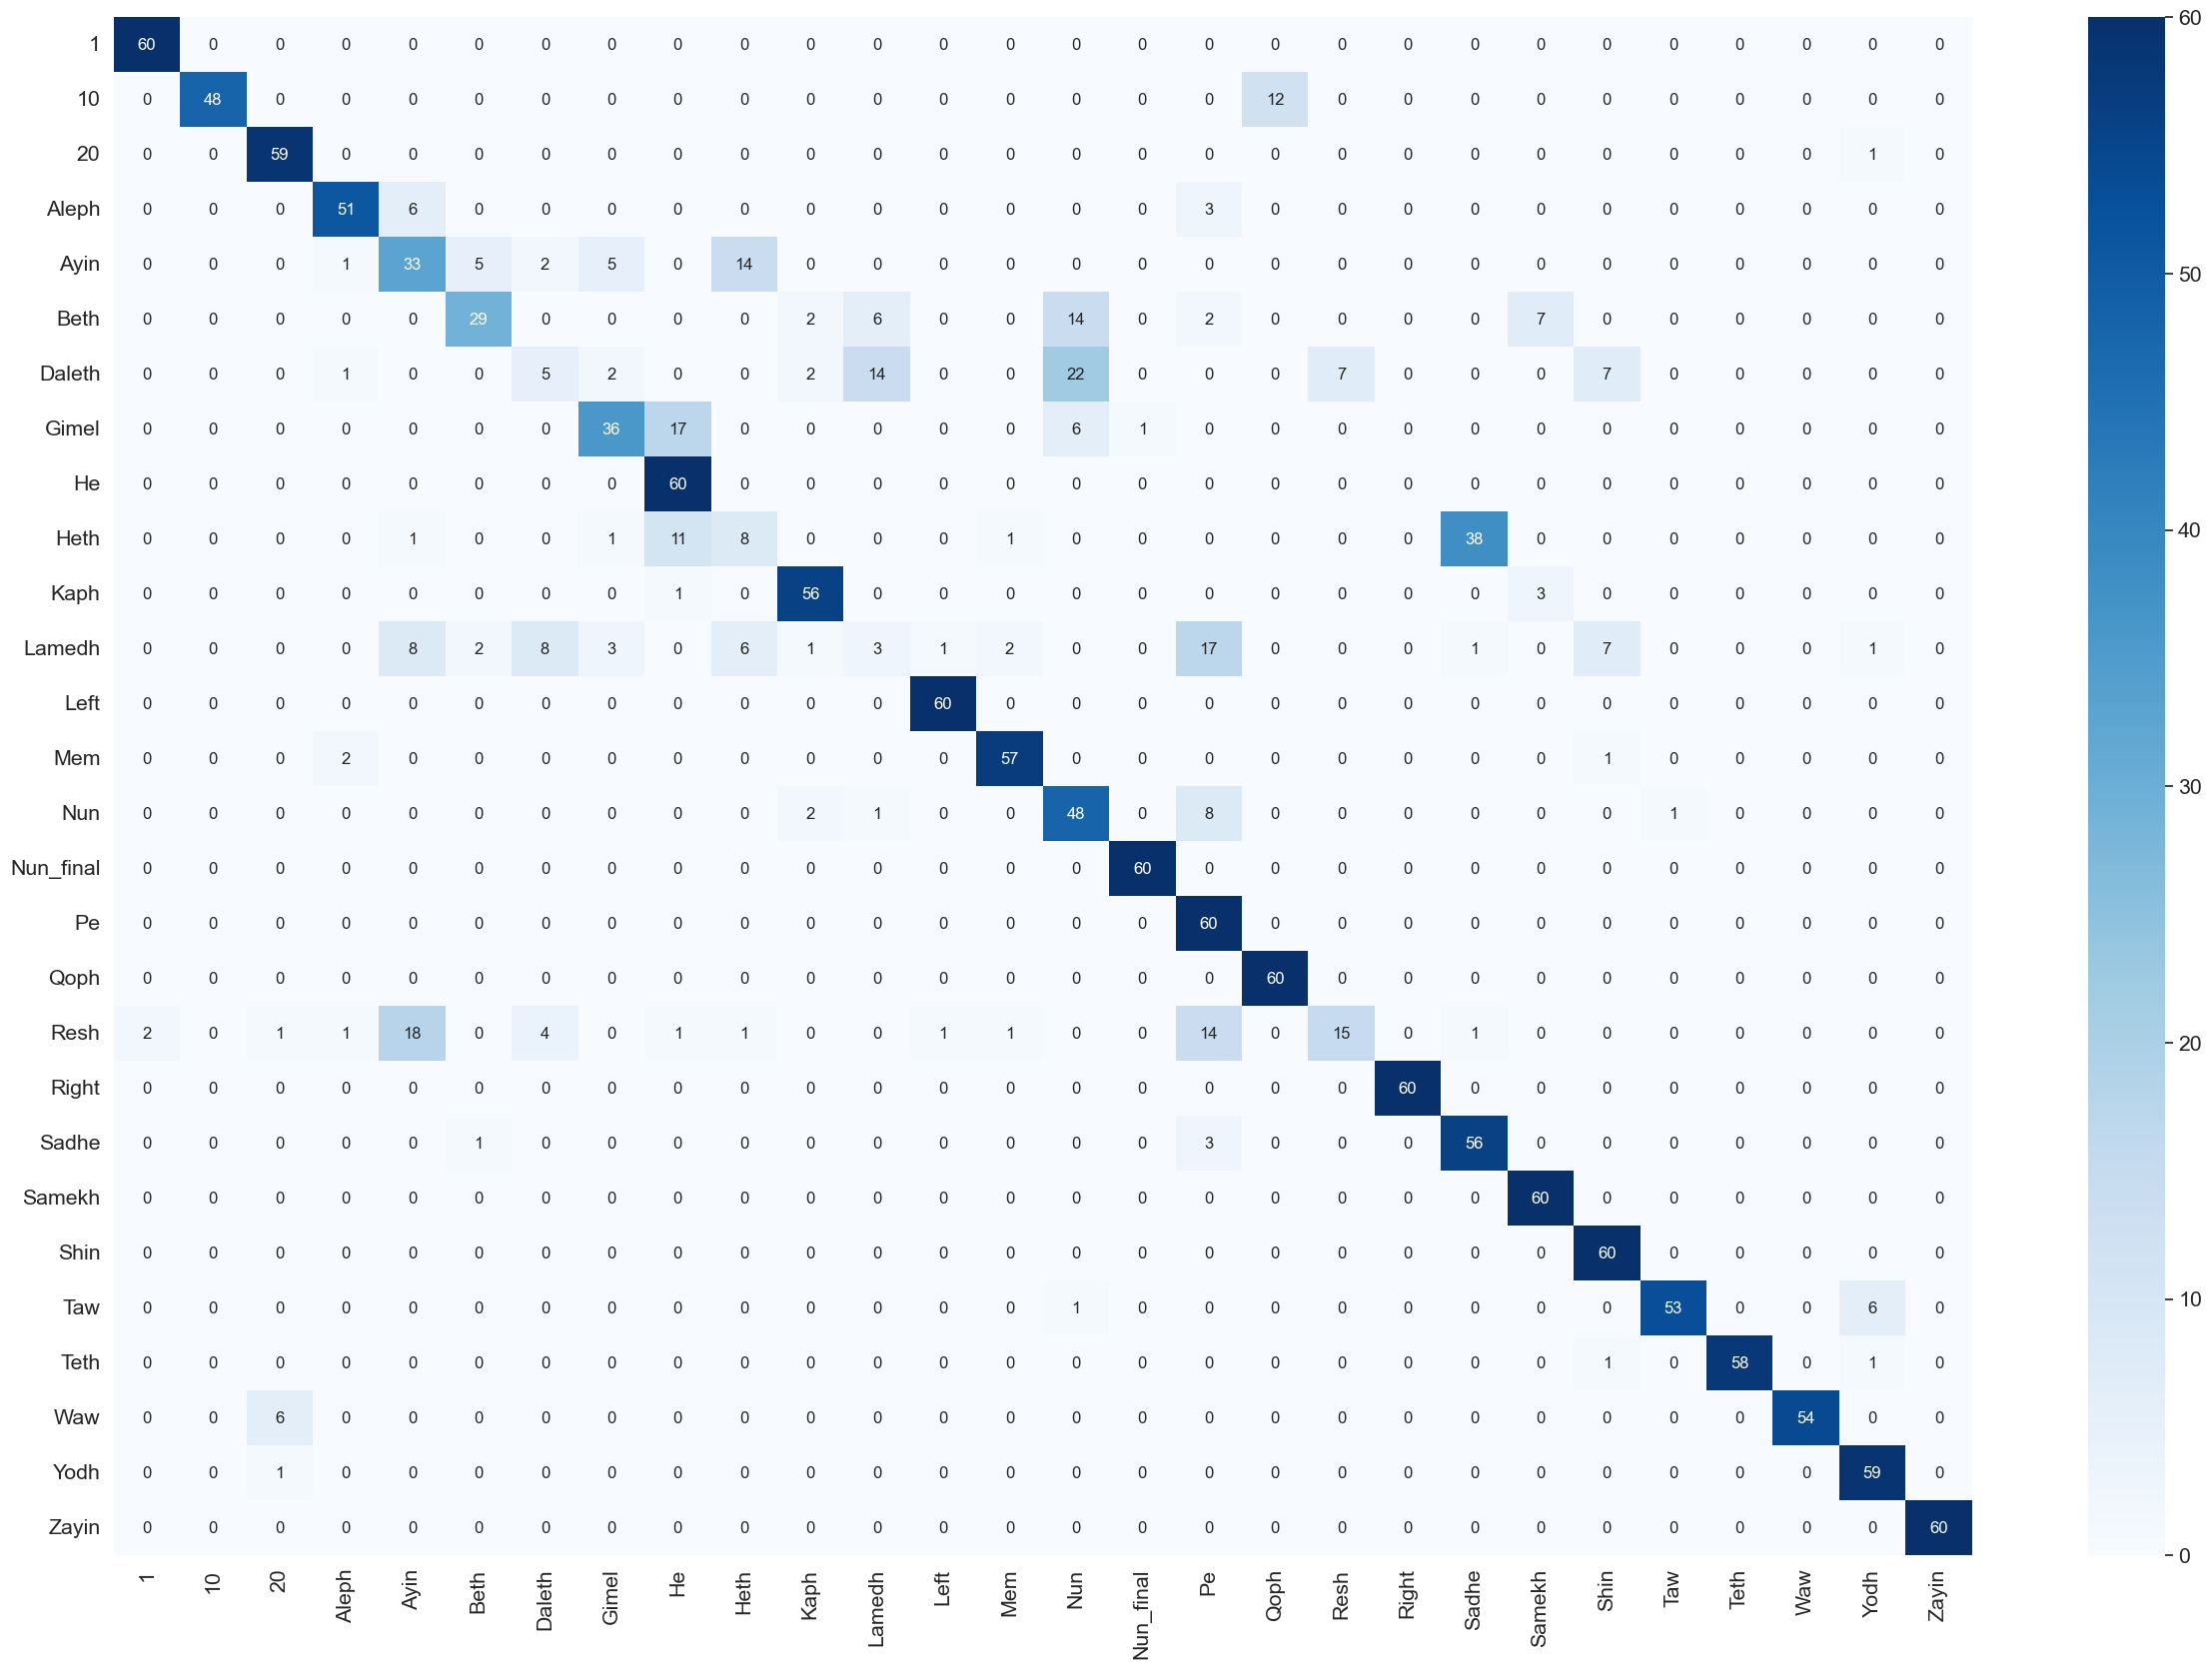


Classification Report
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        60
          10       1.00      0.80      0.89        60
          20       0.88      0.98      0.93        60
       Aleph       0.91      0.85      0.88        60
        Ayin       0.50      0.55      0.52        60
        Beth       0.78      0.48      0.60        60
      Daleth       0.26      0.08      0.13        60
       Gimel       0.77      0.60      0.67        60
          He       0.67      1.00      0.80        60
        Heth       0.28      0.13      0.18        60
        Kaph       0.89      0.93      0.91        60
      Lamedh       0.12      0.05      0.07        60
        Left       0.97      1.00      0.98        60
         Mem       0.93      0.95      0.94        60
         Nun       0.53      0.80      0.64        60
   Nun_final       0.98      1.00      0.99        60
          Pe       0.56      1.00      0.72        60
    

In [49]:
print('Confusion Matrix')
cm = (confusion_matrix(y_true=trueClass, y_pred=predicted))
plt.figure(figsize=(30,20))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}, cmap='Blues', xticklabels=classLabels, yticklabels=classLabels) # font size
plt.show()
print()
print('Classification Report')
print(classification_report(test_generator.classes, predicted, 
                            target_names=classLabels))


### Picture and prediction

1/1 [==============================] - 0s 266ms/step


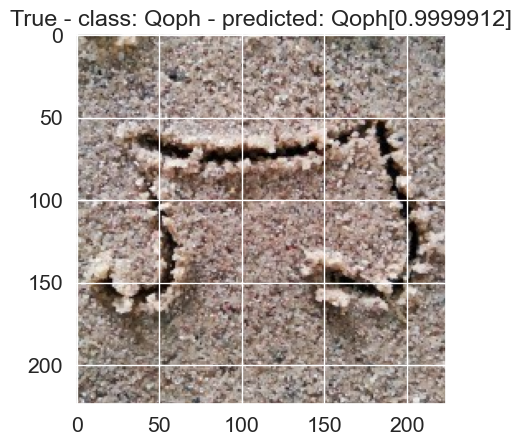

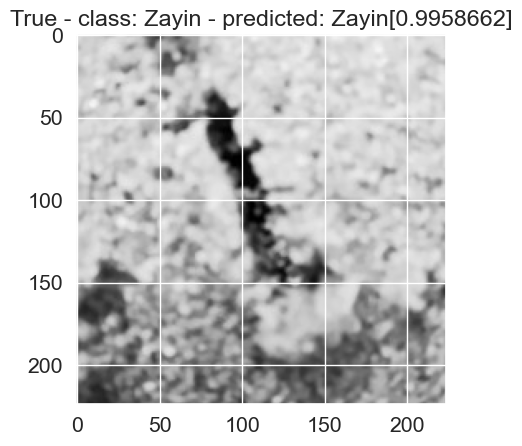

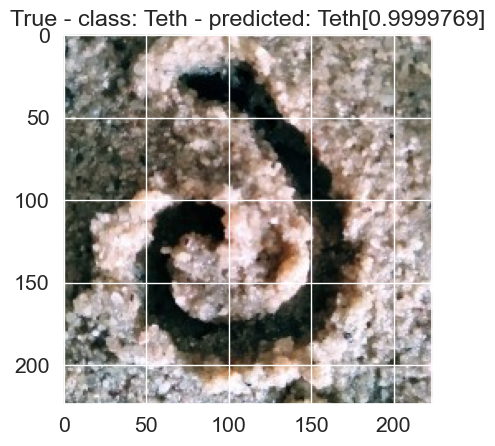

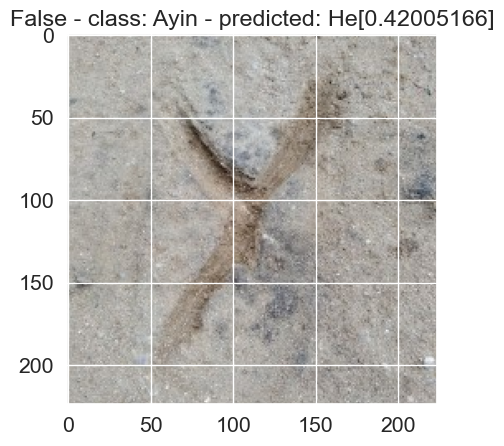

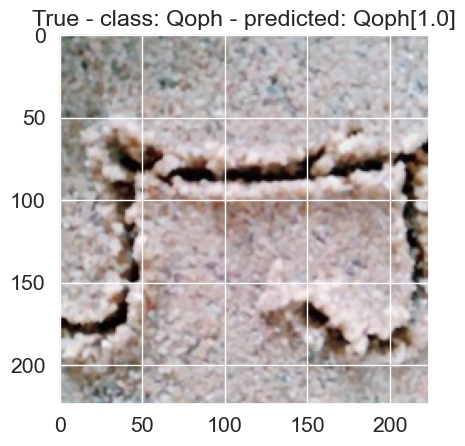

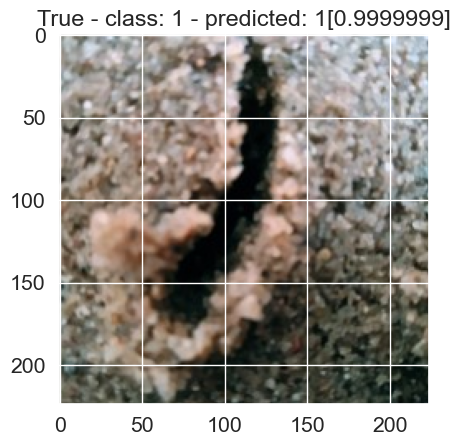

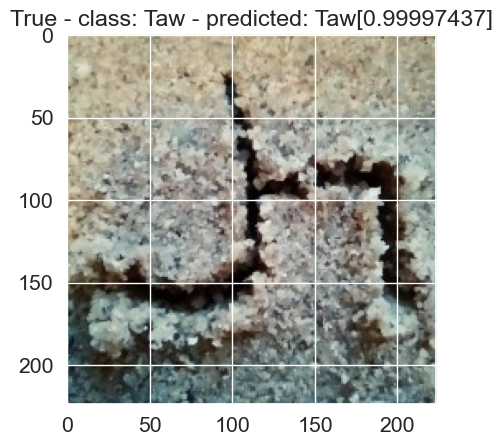

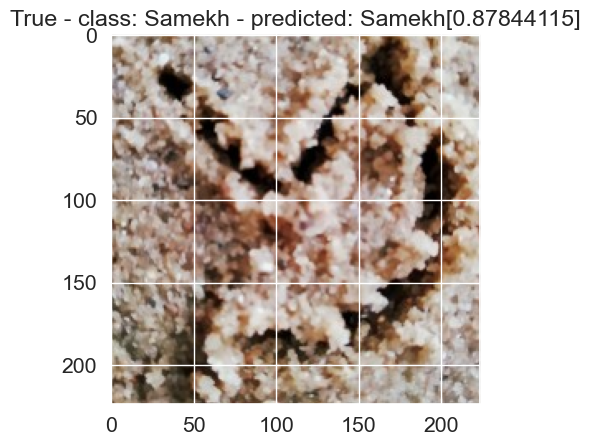

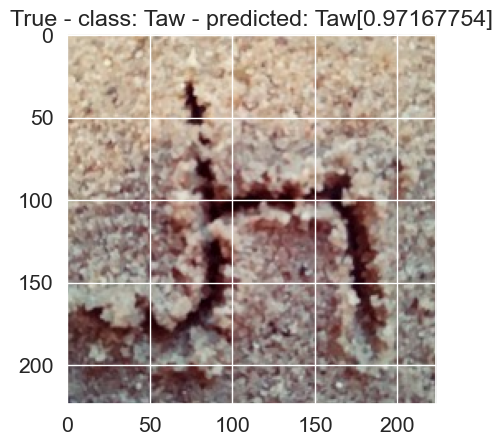

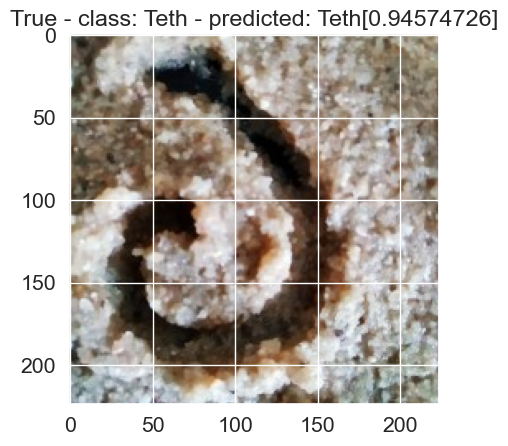

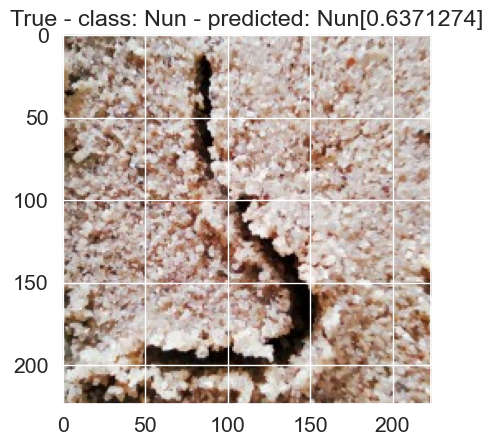

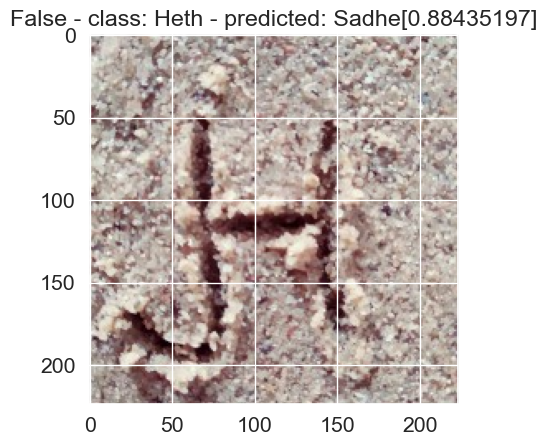

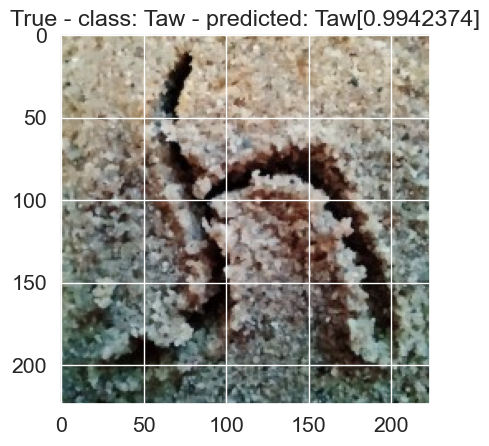

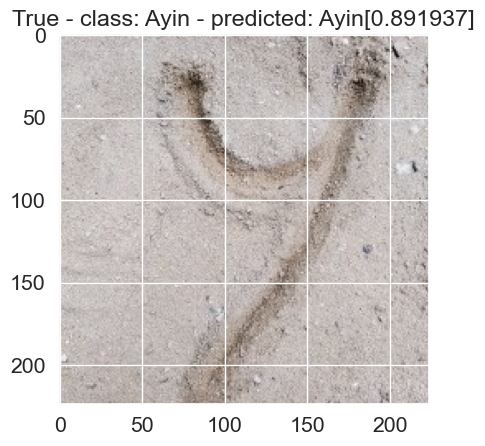

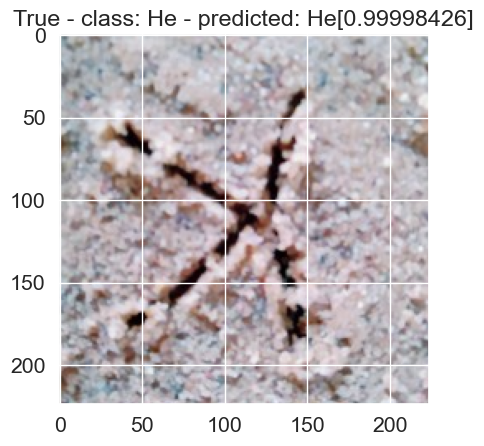

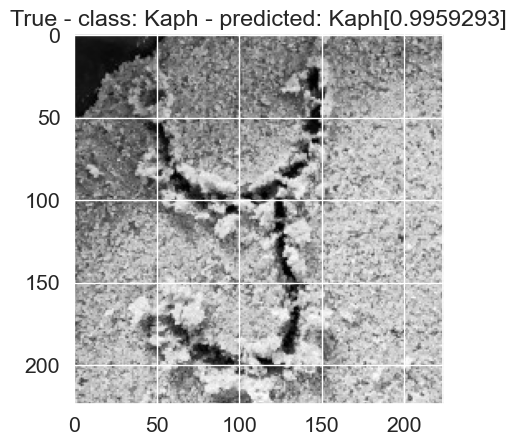

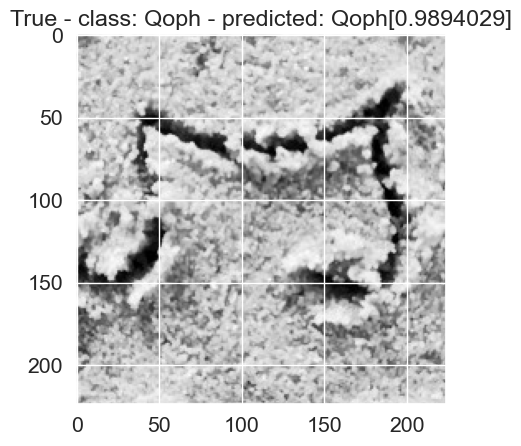

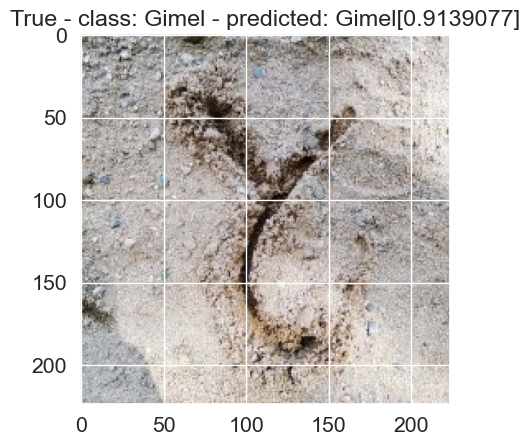

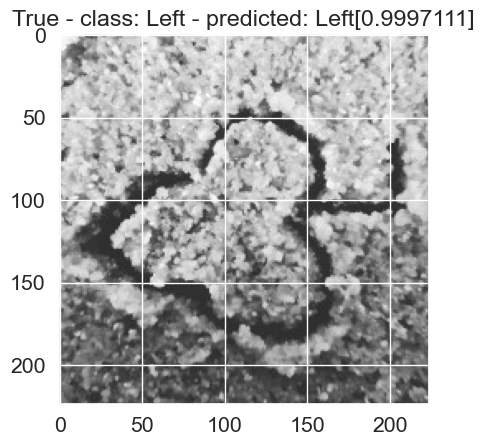

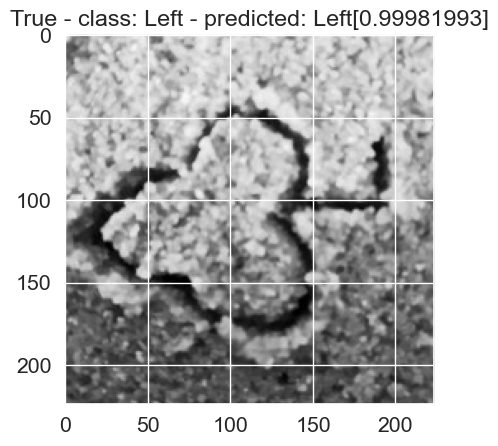

In [35]:
def predict_one(model):
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = target_names[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = target_names[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)